In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split



data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
0,1,Male,19,15,39,Poor
1,2,Male,21,15,81,Poor
2,3,Female,20,16,6,Poor
3,4,Female,23,16,77,Poor
4,5,Female,31,17,40,Poor
...,...,...,...,...,...,...
195,196,Female,35,120,79,Rich
196,197,Female,45,126,28,Rich
197,198,Male,32,126,74,Rich
198,199,Male,32,137,18,Rich


In [34]:
data.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


In [27]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data["Class"] = lb_make.fit_transform(data["Class"])
lb_make = LabelEncoder()
data["Gender"] = lb_make.fit_transform(data["Gender"])

In [28]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,2
197,198,1,32,126,74,2
198,199,1,32,137,18,2


In [29]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000,0.680000
std,57.879185,0.497633,13.969007,26.264721,25.823522,0.663173
min,1.000000,0.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,0.000000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000,1.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000,2.000000


In [15]:
from pandas.api.types import is_numeric_dtype
for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

CustomerID:
	 Mean = 100.50
	 Standard deviation = 57.88
	 Minimum = 1.00
	 Maximum = 200.00
Gender:
	 Mean = 0.44
	 Standard deviation = 0.50
	 Minimum = 0.00
	 Maximum = 1.00
Age:
	 Mean = 38.85
	 Standard deviation = 13.97
	 Minimum = 18.00
	 Maximum = 70.00
Annual Income (k$):
	 Mean = 60.56
	 Standard deviation = 26.26
	 Minimum = 15.00
	 Maximum = 137.00
Spending Score (1-100):
	 Mean = 50.20
	 Standard deviation = 25.82
	 Minimum = 1.00
	 Maximum = 99.00
Class:
	 Mean = 0.68
	 Standard deviation = 0.66
	 Minimum = 0.00
	 Maximum = 2.00


In [42]:
lb_make = LabelEncoder()
data["Class"] = lb_make.fit_transform(data["Class"])
lb_make = LabelEncoder()
data["Gender"] = lb_make.fit_transform(data["Gender"])
data.corr(method='pearson')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Class
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835,-0.137725
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109,-0.073698
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227,0.031136
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903,-0.000623
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000,0.024296
Class,-0.137725,-0.073698,0.031136,-0.000623,0.024296,1.000000


# box plot of indiviuals features

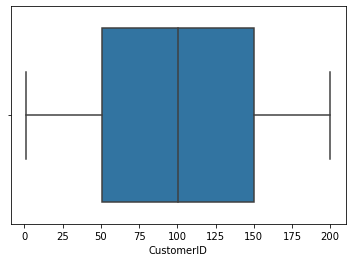

In [17]:
sns.boxplot( x=data["CustomerID"] );
plt.show()

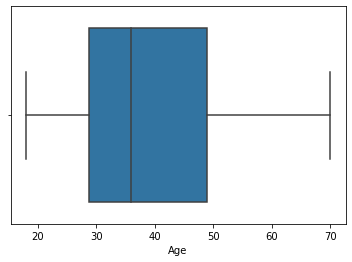

In [19]:
sns.boxplot( x=data["Age"] );
plt.show()

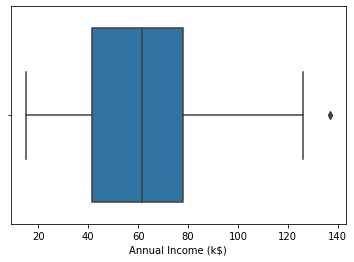

In [21]:
sns.boxplot( x=data["Annual Income (k$)"] );
plt.show()

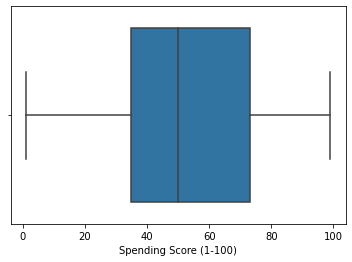

In [22]:
sns.boxplot( x=data["Spending Score (1-100)"] );
plt.show()

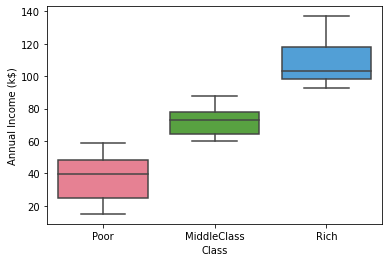

In [33]:
data = pd.read_csv('Mall_Customers.csv')
sns.boxplot(x=data["Class"], y=data["Annual Income (k$)"], palette="husl")
plt.show()

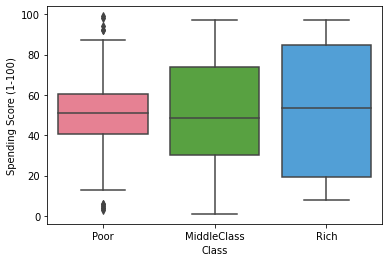

In [34]:
sns.boxplot(x=data["Class"], y=data["Spending Score (1-100)"], palette="husl")
plt.show()

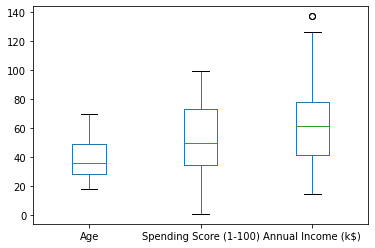

In [44]:

data.plot(x="Class", y=["Age","Spending Score (1-100)","Annual Income (k$)",], kind="box")
plt.show()

# Individuals plots of each feature

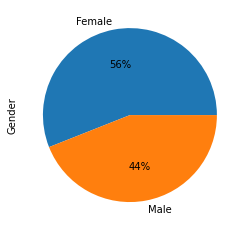

In [4]:
data = pd.read_csv('Mall_Customers.csv')
data['Gender'].value_counts().plot(kind='pie',autopct='%0.f%%',)
plt.show()

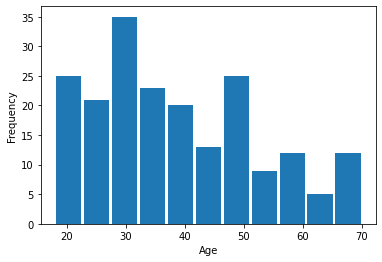

In [39]:

Ages = data["Age"]

Ages.plot.hist( bins=11, rwidth=0.9,
                   )

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


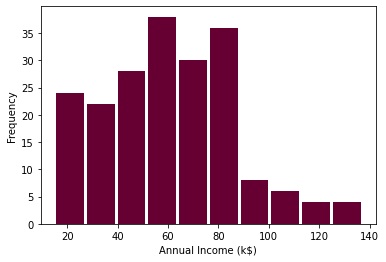

In [56]:
income = data["Annual Income (k$)"]

income.plot.hist( bins=10, rwidth=0.9,color="#660033",
                   )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

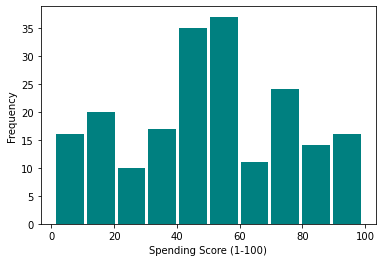

In [62]:
score = data["Spending Score (1-100)"]

score.plot.hist( bins=10, rwidth=0.9,color="#008080",
                   )

plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

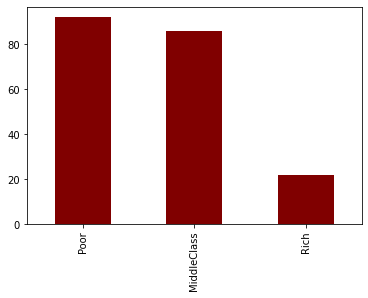

In [66]:
data['Class'].value_counts().plot(kind='bar',color="#800000",)
plt.show()

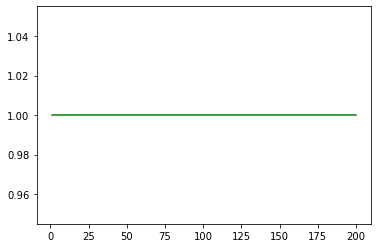

In [79]:
data['CustomerID'].value_counts().plot(kind="line", color="#008000")
plt.show()

# Comparative plots

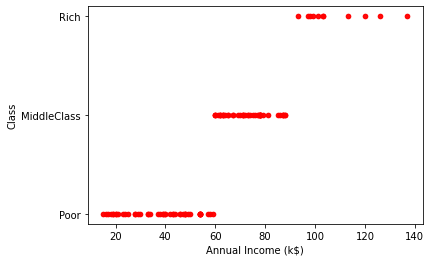

In [17]:
data.plot(kind="scatter", x="Annual Income (k$)", y="Class" ,alpha=0.8,color="red")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


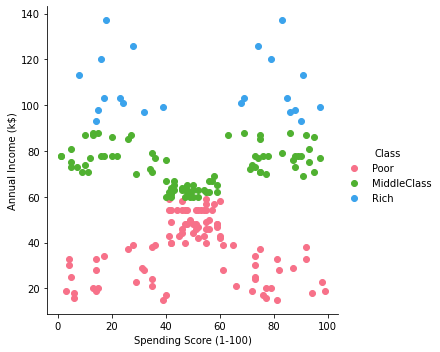

In [21]:
sns.FacetGrid(data, hue="Class", palette="husl", size=5) \
   .map(plt.scatter, "Spending Score (1-100)", "Annual Income (k$)") \
   .add_legend()
plt.show()

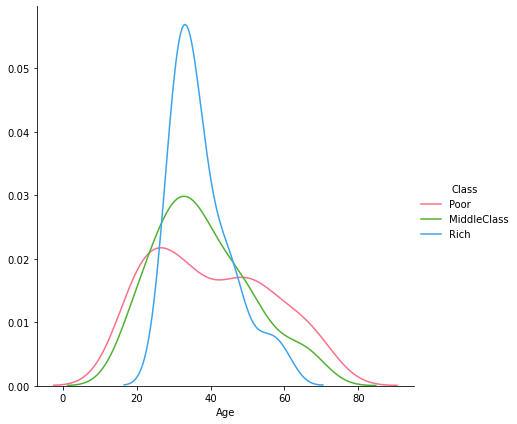

In [39]:
sns.FacetGrid(data, hue="Class", palette="husl", size=6).map(sns.kdeplot, "Age").add_legend()
plt.show()

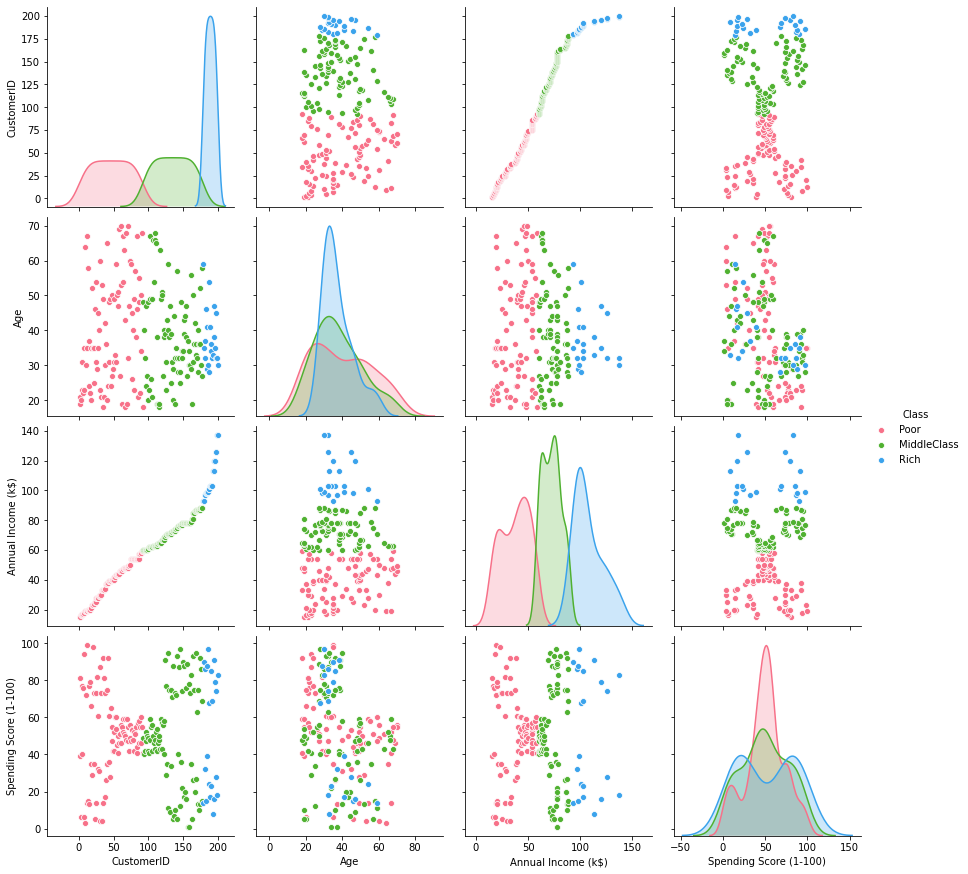

In [41]:
sns.pairplot(data, hue="Class", palette="husl", size=3)
plt.show()